## reference: 
#### 1.Kumar, Ashish. Learning Predictive Analytics with Python. Packt Publishing Ltd, 2016.
#### 2.http://scikit-learn.org/0.15/modules/model_evaluation.html

In [193]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data load



In [194]:
data = pd.read_csv('binary_data.csv', header=0)
data = data.dropna()

print(data.shape)
print(list(data.columns))

(95066, 13)
['var0', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12']


In [195]:
import pandas as pd
import folium

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,0,0,2,838,$96300,0,4,107,N,1,A,893,1
1,0,2,1,837,$59300,1,1,611,N,4,B,389,1
2,0,1,1,786,$38500,0,1,212,N,2,C,788,0
3,0,0,1,481,$75300,1,2,428,N,1,C,572,0
4,0,1,1,674,$63200,1,2,91,N,1,B,909,1


In [196]:
### Change var4 type to numeric data type
data['var4'] = data['var4'].replace('[\$,]', '', regex=True).astype(float)


In [197]:
data.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,0,0,2,838,96300.0,0,4,107,N,1,A,893,1
1,0,2,1,837,59300.0,1,1,611,N,4,B,389,1
2,0,1,1,786,38500.0,0,1,212,N,2,C,788,0
3,0,0,1,481,75300.0,1,2,428,N,1,C,572,0
4,0,1,1,674,63200.0,1,2,91,N,1,B,909,1


In [198]:
##checking for missing value
data.isnull().sum()


var0     0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
var10    0
var11    0
var12    0
dtype: int64

## Data exploration

In [199]:
data['var0'].value_counts()

0    92728
1     2338
Name: var0, dtype: int64

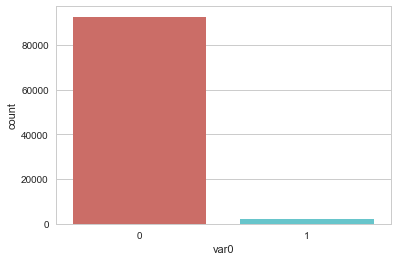

In [200]:
sns.countplot(x='var0',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

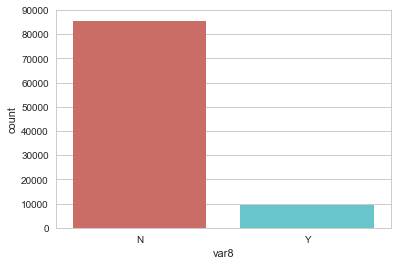

In [201]:
sns.countplot(x='var8',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

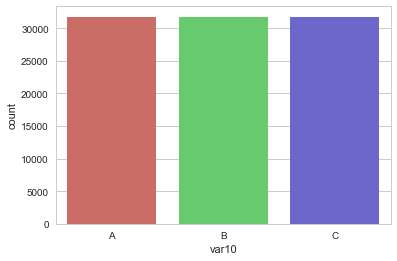

In [202]:
sns.countplot(x='var10',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [203]:
data.groupby('var0').mean()

,var1,var2,var3,var4,var5,var6,var7,var9,var11,var12
var0,,,,,,,,,,
0,0.998048,0.968187,494.835745,50485.607368,2.079253,3.008800,499.008088,6.076147,500.991912,0.666606
1,0.980325,2.346878,639.159110,50393.584260,0.986313,3.038067,509.817793,5.194611,490.182207,0.682635


#### Observations: var2, var3, var5, and var9 are showing obvious difference between var0=1 and var0=0

In [204]:
### Group by category varibles
data.groupby('var8').mean()

,var0,var1,var2,var3,var4,var5,var6,var7,var9,var11,var12
var8,,,,,,,,,,,
N,0.024598,0.998562,1.003215,498.516689,50487.251131,2.167869,3.011504,499.426774,6.061541,500.573226,0.666963
Y,0.024557,0.989086,0.992024,497.204429,50448.273691,1.015636,2.991710,497.901983,5.990975,502.098017,0.667331


In [205]:
data.groupby('var10').mean()

,var0,var1,var2,var3,var4,var5,var6,var7,var9,var11,var12
var10,,,,,,,,,,,
A,0.015197,0.995197,1.006635,498.999179,50550.783570,2.254913,3.023065,498.953207,6.064202,501.046793,1.0
B,0.035108,0.998363,0.997009,498.327088,50494.565320,1.004912,3.006486,499.296011,5.952486,500.703989,1.0
C,0.023439,0.999273,1.002653,497.829516,50404.662476,2.900717,2.999021,499.572448,6.147045,500.427552,0.0


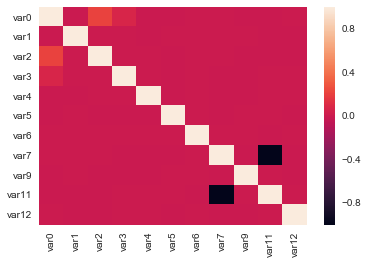

In [206]:
##Checking for independence between features
sns.heatmap(data.corr())  
plt.show()


### Observations: looks ok, but var7 and var11 are negatively correlated 


## Data visualizations

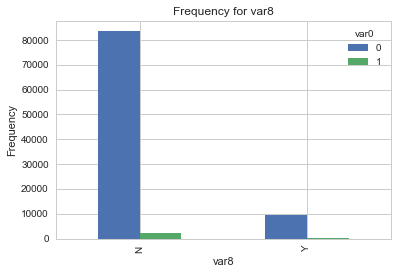

In [207]:
%matplotlib inline
pd.crosstab(data.var8,data.var0).plot(kind='bar')
plt.title('Frequency for var8')
plt.xlabel('var8')
plt.ylabel('Frequency')
plt.savefig('count_plot')

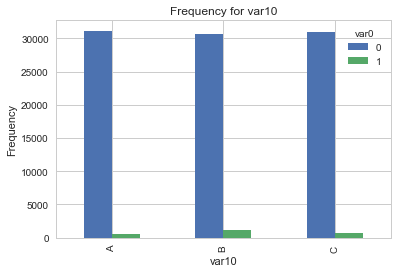

In [208]:
%matplotlib inline
pd.crosstab(data.var10,data.var0).plot(kind='bar')
plt.title('Frequency for var10')
plt.xlabel('var10')
plt.ylabel('Frequency')
plt.savefig('count_plot')

## Create dummy variables


In [209]:
# Converting Categorical Features
data.var8.replace(('Y', 'N'), (1, 0), inplace=True)
var10 = pd.get_dummies(data['var10'],drop_first = True)
# drop A to avoid of the multicollinearity
data.drop(['var10'], axis =1, inplace = True)
data = pd.concat([data,var10],axis = 1)
data.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var11,var12,B,C
0,0,0,2,838,96300.0,0,4,107,0,1,893,1,0,0
1,0,2,1,837,59300.0,1,1,611,0,4,389,1,1,0
2,0,1,1,786,38500.0,0,1,212,0,2,788,0,0,1
3,0,0,1,481,75300.0,1,2,428,0,1,572,0,0,1
4,0,1,1,674,63200.0,1,2,91,0,1,909,1,1,0


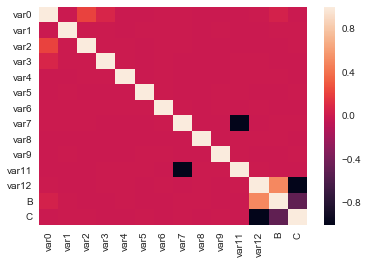

In [210]:
sns.heatmap(data.corr()) 

 ### Observations: looks ok, but var7 and var11, var12 and c are highly correlated.We drop var7 and var12

In [212]:
data_vars=data.columns.values.tolist()
y=['var0']
X=['var1','var2','var3','var4','var5','var6','var8','var9','var11','B','C']

## Feature Selection

In [213]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(data[X], data[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


In [214]:
#### We can select all the varibles we have 

In [223]:
cols=['var1','var2','var3','var4','var5','var6','var8','var9','var11','B','C'] 
X=data[cols]
y=data['var0']

## Implementing the model

In [224]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.122494
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   var0   No. Observations:                95066
Model:                          Logit   Df Residuals:                    95055
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Jan 2018   Pseudo R-squ.:                -0.06135
Time:                        13:35:58   Log-Likelihood:                -11645.
converged:                       True   LL-Null:                       -10972.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var1          -0.4076      0.021    -18.974      0.000      -0.450      -0.365
var2           0.5963      0

### All the varibles are statistically significant

## Logistic Regression Model evaluation and validation

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)



In [226]:
## predict the test results and test the Accuracy 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.973
Accuracy of logistic regression classifier on train set: 0.975


## cross validation: evaluating estimator performance to aviod overfitting


In [227]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.976


## confusion matrix

In [228]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[27770     5]
 [  744     1]]


### The results are telling us the numbebr of correct prodection is 27775 and the number of incorrect prediction is 745

## classification report

In [229]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99     27775
          1       0.17      0.00      0.00       745

avg / total       0.95      0.97      0.96     28520



## ROC Curvefrom sklearn import metrics

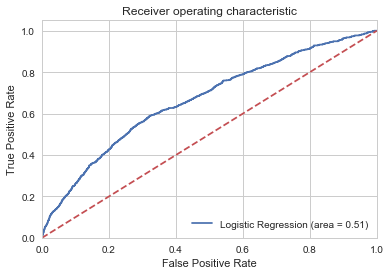

0.66593133944266913

In [230]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])


### The result is better if the number we got is closer to 1. We get 0.665, which is ok, but not good enough.